<a href="https://colab.research.google.com/github/ShrutikaMamulkar/marketprophecy/blob/main/shrutika_mamulkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
a=files.upload()

Saving NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv to NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv


In [ ]:
ls

'NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv'   sample_data/
'NASDAQ Training Data - 1st Jan 2016 to 1st Jan 2022.csv'


In [ ]:
nasdaq_train=pd.read_csv('NASDAQ Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [ ]:
nasdaq_test=pd.read_csv('NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv')

In [ ]:
nasdaq_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
nasdaq_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
1,2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2,2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
3,2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
4,2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000


In [ ]:
nasdaq_train.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999677,0.999459,0.999177,0.999177,0.693173
High,0.999677,1.000000,0.999240,0.999482,0.999482,0.699307
Low,0.999459,0.999240,1.000000,0.999576,0.999576,0.683926
Close,0.999177,0.999482,0.999576,1.000000,1.000000,0.691050
Adj Close,0.999177,0.999482,0.999576,1.000000,1.000000,0.691050
Volume,0.693173,0.699307,0.683926,0.691050,0.691050,1.000000


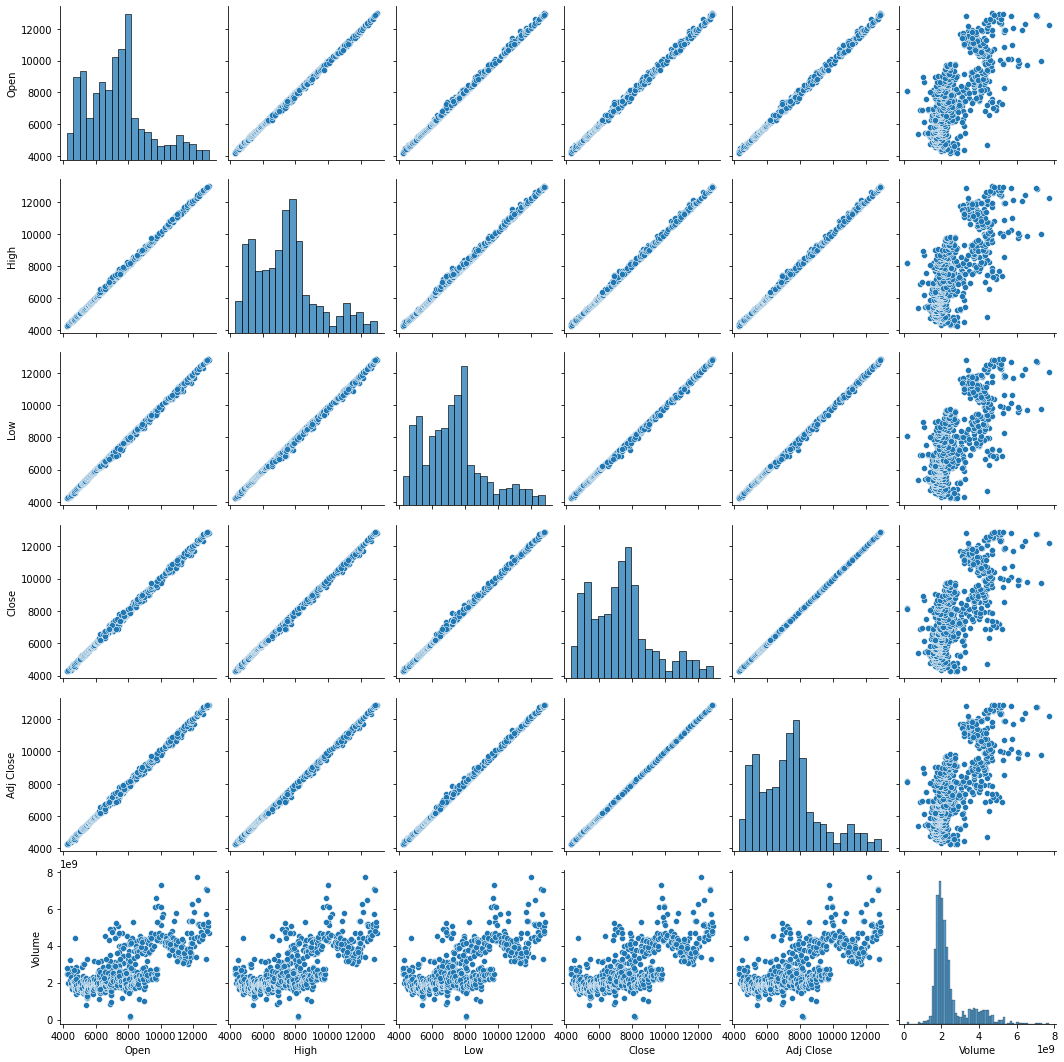

In [ ]:
sns.pairplot(nasdaq_train)

In [ ]:
nasdaq_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,15732.500000,15832.799805,15644.089844,15832.799805,15832.799805,4412130000
1,2022-01-04,15852.139648,15852.139648,15512.410156,15622.719727,15622.719727,5109270000
2,2022-01-05,15547.160156,15586.299805,15095.179688,15100.169922,15100.169922,5011990000
3,2022-01-06,15024.150391,15198.450195,14914.870117,15080.860352,15080.860352,4774740000
4,2022-01-07,15095.719727,15171.019531,14877.629883,14935.900391,14935.900391,4229270000


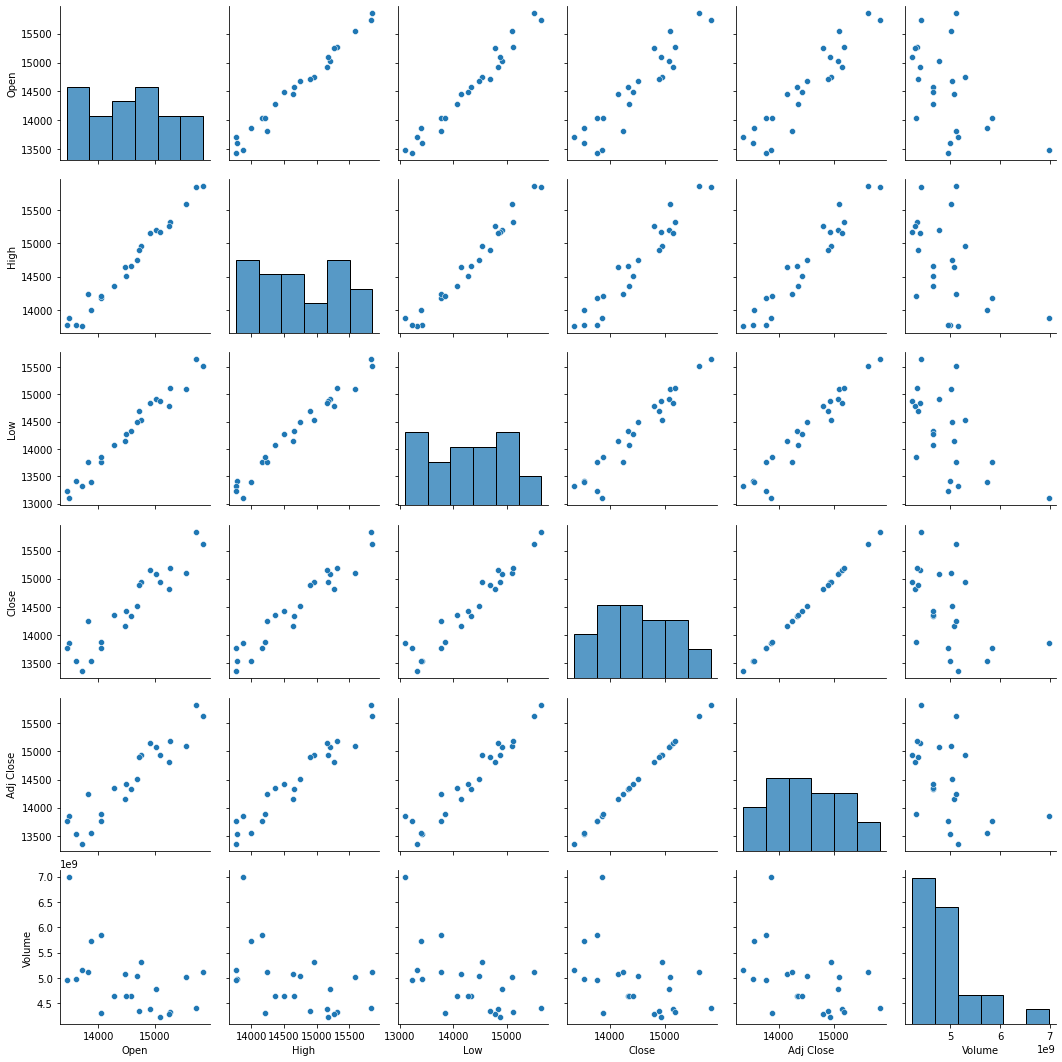

In [ ]:
sns.pairplot(nasdaq_test)

In [ ]:
nasdaq_test.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.989434,0.983972,0.931942,0.931942,-0.504329
High,0.989434,1.000000,0.985640,0.964340,0.964340,-0.475793
Low,0.983972,0.985640,1.000000,0.963217,0.963217,-0.572297
Close,0.931942,0.964340,0.963217,1.000000,1.000000,-0.473176
Adj Close,0.931942,0.964340,0.963217,1.000000,1.000000,-0.473176
Volume,-0.504329,-0.475793,-0.572297,-0.473176,-0.473176,1.000000


In [ ]:
x_train=nasdaq_train[['Open',	'High','Low','Close','Adj Close']]
y_train=nasdaq_train['Volume']

In [ ]:
print(x_train.shape)

(1259, 5)


In [ ]:
print(y_train.shape)

(1259,)


In [ ]:
x_test=nasdaq_test[['Open',	'High','Low','Close','Adj Close']]
y_test=nasdaq_test['Volume']

In [ ]:
print(x_test.shape)

(23, 5)


In [ ]:
print(y_test.shape)

(23,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open,-6.223204e+05
High,5.578155e+06
Low,-4.794791e+06
Close,4.438536e+04
Adj Close,4.438536e+04


In [ ]:
x.mean()

Open         7359.157905
High         7404.308974
Low          7309.730950
Close        7361.233510
Adj Close    7361.233510
dtype: float64

In [ ]:
x_test.shape

(23, 5)

In [ ]:
pred=lm.predict(x_test)

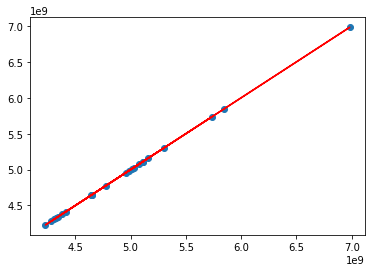

In [ ]:
plt.scatter(y_test,y_test)
plt.plot(y_test,y_test, color='red')

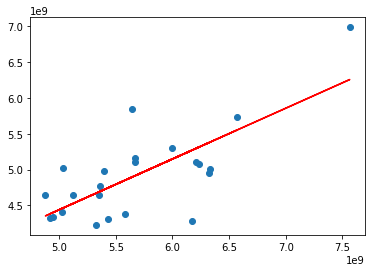

In [ ]:
c,d = np.polyfit(pred, y_test, 1)
plt.scatter(pred,y_test)
plt.plot(pred, c*pred+d,color='r')

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 777758384.6171471
MSE: 7.906932082471457e+17
RMSE: 889209316.3294826
